In [4]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

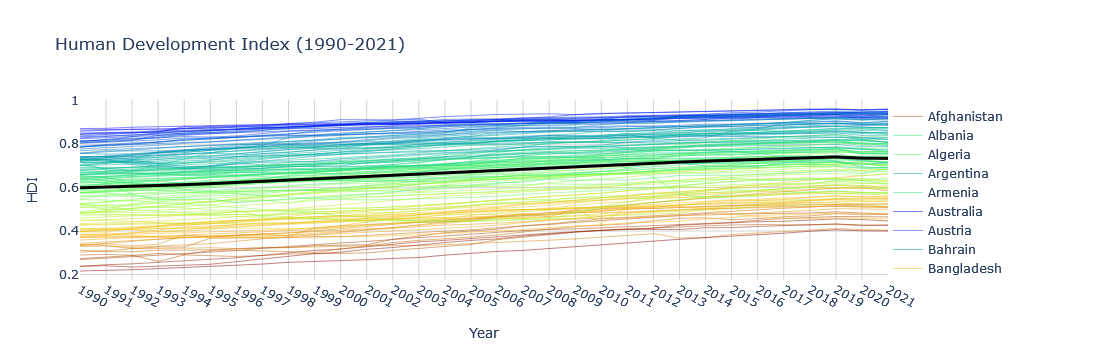

In [5]:
HDI_full = pd.read_csv("datasets/Human Development Index.csv")

HDI_full = HDI_full.groupby('Country').first()

columns = ["Human Development Index (" + str(i) + ")" for i in range(1990, 2022)]

# filter data 2021
HDI = HDI_full[columns]

# Rename some countries for clarity
HDI.rename({'The Democratic Republic of the Congo':'DRC'}, inplace = True)

# Identify the columns related to the Human Development Index from 1990 to 2022
hdi_columns = [col for col in HDI.columns]

# Filter the dataframe to include only the required columns
filtered_HDI = HDI.dropna()

hdi_data = filtered_HDI

# Normalize the first year's HDI values for color mapping
first_year = hdi_data.columns[1]
first_year_values = hdi_data[first_year].values
norm = plt.Normalize(first_year_values.min(), first_year_values.max())
colors = plt.cm.rainbow(norm(first_year_values))

# Create the plotly figure
fig = go.Figure()

# year legend
years = [str(year) for year in range(1990, 2022)]

# Add traces for each country with color mapping based on the first year's HDI value
for i in range(len(hdi_data.index)):
    index = i
    row = hdi_data.iloc[i]
    country_color = 'rgb(' + str(int(256 - (colors[index][0] * 255)))\
    + "," + str(int((colors[index][1] * 255))) + "," + str(int(256 - (colors[index][2] * 255))) + ")"
    country_data = row[:].dropna()
    fig.add_trace(go.Scatter(
        x=years,
        y=country_data,
        mode='lines',
        line=dict(width=0.5, color=country_color),
        showlegend=True,
        name = hdi_data.index[i]
    ))


# Calculate and plot the world average HDI
world_avg = hdi_data.iloc[:, :].mean(axis=0)
fig.add_trace(go.Scatter(
    x=years,
    y=world_avg,
    mode='lines',
    line=dict(width=3, color='black'),
    name='World Mean'
))

# Update layout
fig.update_layout(
    title='Human Development Index (1990-2021)',
    xaxis_title='Year',
    yaxis_title='HDI',
    showlegend=True,
    legend=dict(orientation="v", yanchor="top", y=0.99, xanchor="left", x=1),
    plot_bgcolor='white',
    autosize = True,
    height = 800
)

# Customize hover label formatting
fig.update_traces(
    hovertemplate='Year: %{x}<br>HDI: %{y}'
)

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Show the figure
fig.show()
